# Proyecto del Día 14 - Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.

¡Mucha suerte y que te diviertas!

### 1. Cargar los datos de clientes provistos en un archivo CSV.

In [27]:
import pandas as pd
import numpy as np
import uuid 
import hashlib 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [22]:
data = pd.read_csv('C:/Users/KeythiCL/Downloads/clientes.csv')
data

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589
...,...,...,...,...,...
195,Barbara Jones,747 Eliot,47,0,51931
196,Richard Brown,673 Tagore,39,1,47712
197,Mary Garcia,617 Neruda,64,1,45261
198,James Wilson,236 Keats,43,1,46787


### 2. Aplicar técnicas de anonimización al campo direccion, edad y salario para proteger la identidad de los clientes.

In [23]:
# Anonimización a la columna dirección
data['direccion'] = np.random.permutation(data['direccion'])
## data.dro('direccion', axis = 1, inplace = True)

# Anonimización a la columna edad
data['edad'] = (data['edad'] // 10) * 10

# Anonimización a la columna salario
ruido = np.random.normal(0, 100, size = data['salario'].shape)
data['salario'] += ruido

# Vemos como quedo
data

,nombre,direccion,edad,categoria,salario
0,Richard Martin,211 Rimbaud,60,0,61003.147691
1,James Jones,143 Cummings,60,1,54002.566646
2,Patricia Wilson,440 Frost,10,0,60261.268749
3,Elizabeth Robinson,871 Larkin,20,1,42163.158422
4,Charles Brown,625 Lorca,20,1,37608.305929
...,...,...,...,...,...
195,Barbara Jones,617 Neruda,40,0,51969.676170
196,Richard Brown,675 Browning,30,1,47670.214397
197,Mary Garcia,935 Dickinson,60,1,45374.665918
198,James Wilson,757 Plath,40,1,46714.121210


### 3. Aplicar técnicas de pseudonimización al campo nombre.

In [24]:
# Pseudonimizar el campo nombre
for i in range(len(data)):
    data.loc[i, 'nombre'] = 'Cliente' + str(i)
data.head()

,nombre,direccion,edad,categoria,salario
0,Cliente0,211 Rimbaud,60,0,61003.147691
1,Cliente1,143 Cummings,60,1,54002.566646
2,Cliente2,440 Frost,10,0,60261.268749
3,Cliente3,871 Larkin,20,1,42163.158422
4,Cliente4,625 Lorca,20,1,37608.305929


In [25]:
# Creo una lista vacia
id_pseudo = []

# Recorro el dataframe y lo paso a uuid
for n in range(len(data)): #lo que encuentre desde 0 hasta el rango de data
    id_pseudo.append(str(uuid.uuid4())) ##en formato de string

# Creo una columna con id_pseudo
data['id_pseudo'] = id_pseudo

# Elimino la columna nombre
data.drop('nombre', axis = 1, inplace=True)

# Vemos
data

,direccion,edad,categoria,salario,id_pseudo
0,211 Rimbaud,60,0,61003.147691,80bcc7e8-e147-4831-a33d-fcae543698f8
1,143 Cummings,60,1,54002.566646,a5265708-f97a-4fe5-abed-96f92bced0e4
2,440 Frost,10,0,60261.268749,4c8e7d71-db39-4580-947f-cbff5157d209
3,871 Larkin,20,1,42163.158422,2ff0f0b1-4bf0-4554-a499-72bd7a653a02
4,625 Lorca,20,1,37608.305929,cc4c9c11-dcc7-494e-8056-3cb68808f59f
...,...,...,...,...,...
195,617 Neruda,40,0,51969.676170,96445886-0ee4-4aa1-a5c7-8e33a353704a
196,675 Browning,30,1,47670.214397,a10a1fc9-2c82-433f-b98f-dc336ed9cab2
197,935 Dickinson,60,1,45374.665918,808e7242-be1e-4ab0-a2f1-c2fe18cc68d7
198,757 Plath,40,1,46714.121210,7bcd3890-5cca-4d98-9bf4-5e934194590e


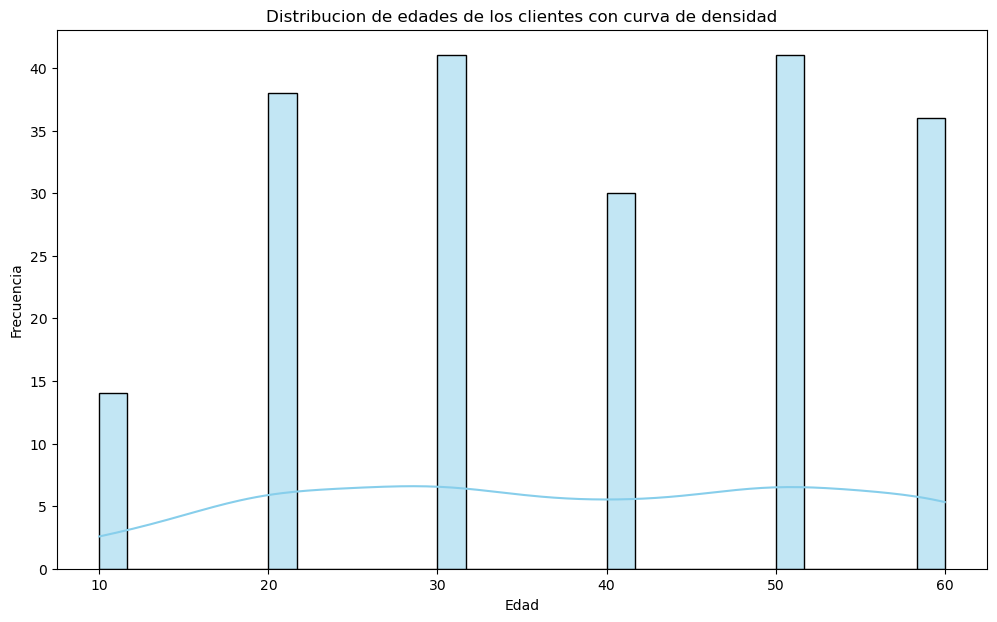

In [29]:
# Visualizacion 1: Distribución de las edades con curva de densidad
plt.figure(figsize=(12,7))
ax = sns.histplot(data['edad'],
                  kde=True,
                  color='skyblue',
                  bins=30)
ax.set(title='Distribucion de edades de los clientes con curva de densidad',
       xlabel= 'Edad',
       ylabel= 'Frecuencia');

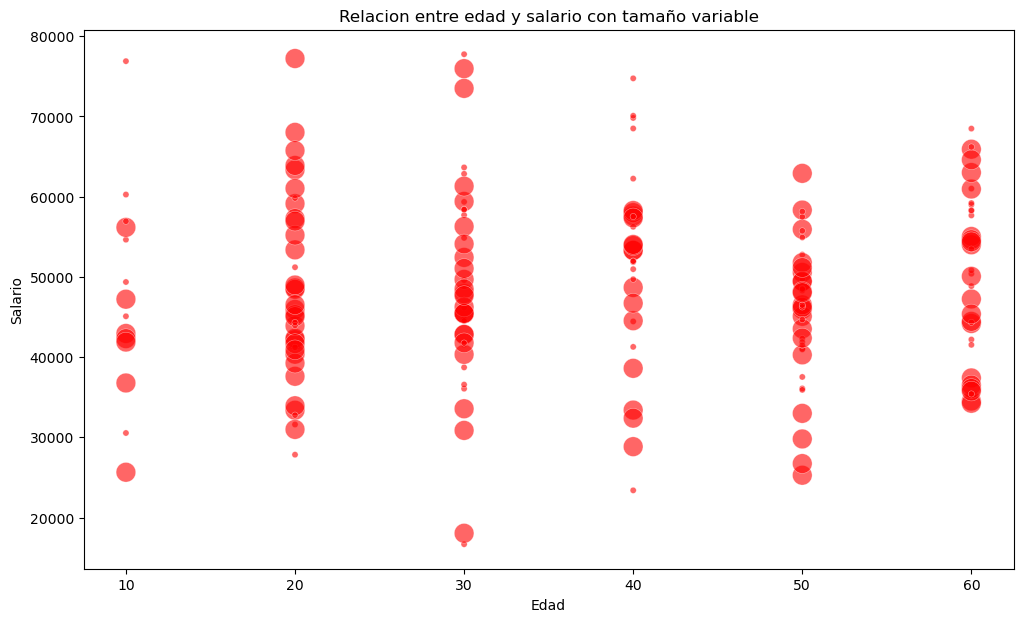

In [30]:
# Visualizacion 2: Relacion entre edad y salario con tamaño variable
plt.figure(figsize=(12,7))
sizes = data['categoria'].replace({0: 50, 1: 100}) #Asignamos tamaño segun categoria para ilustrar
scatter = sns.scatterplot(x = 'edad',
                          y = 'salario',
                          size = sizes,
                          legend=False,
                          sizes=(20,200),
                          data=data,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relacion entre edad y salario con tamaño variable',
       xlabel= 'Edad',
       ylabel= 'Salario');

[Text(0.5, 1.0, 'Mapa de Calor de Correlación entre variables')]

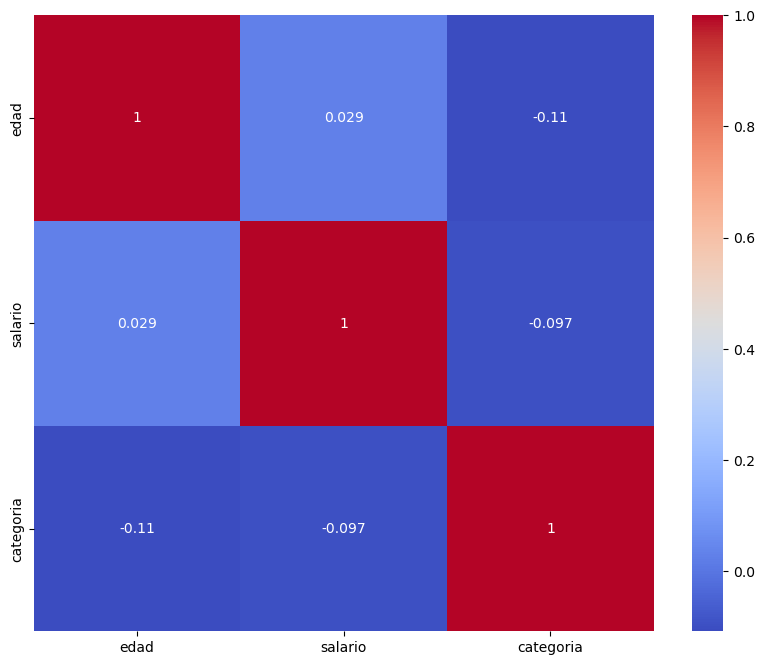

In [32]:
# Visualizacion 3: Mapa de Calor de Correlación entre variables
plt.figure(figsize=(10,8))

# Calculamos la matriz de correlación
correlacion_matrix = data[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlacion_matrix,
                      annot = True,
                      cmap = 'coolwarm')

ax.set(title='Mapa de Calor de Correlación entre variables')

### 4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.

In [33]:
# Agrupamos categoria
agrupado = data.groupby('categoria')

# Creamos un dataframe vacio
data_balanceada = pd.DataFrame()

# Creamos un for que recorre agrupado 
for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo, 
                               replace=True, #los mismos registros se pueden seleccionar multiples veces
                               n_samples=10, #cada grupo tendra una cantidad de 10 registros
                                random_state=123) #semilla de num aleatorios
    data_balanceada = pd.concat([data_balanceada, grupo_balanceado])

data_balanceada

,direccion,edad,categoria,salario,id_pseudo
158,563 Baudelaire,50,0,41478.197268,21e31eb1-c67f-421e-8459-21ec678b28be
42,816 Hughes,30,0,59351.538226,ca9504f2-30c4-4984-b4db-167980acf3df
194,214 Pound,40,0,49704.915026,1f603d1b-55ed-4faa-9fb1-afee78786d62
133,827 Sexton,50,0,41877.371397,e4b3f490-a569-4f95-a305-b659831cb4d2
114,167 Angelou,60,0,53474.973187,3522b301-7750-4d1b-858c-ecb5f1465f9c
177,775 Neruda,40,0,51936.160693,5f35e5b4-17ec-45d3-a124-96bc5b204d0e
83,199 Auden,30,0,46152.554952,ea95a7da-d47b-4b1f-a743-c0940aa92a35
113,548 Angelou,60,0,68481.207579,506b4d29-472f-45a5-bbdc-b9dd678cff0b
56,542 Basho,40,0,51843.368945,d927cf21-950e-4544-a4c8-73295b00b83d
194,214 Pound,40,0,49704.915026,1f603d1b-55ed-4faa-9fb1-afee78786d62


### 5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.

In [34]:
if (data_balanceada['categoria'] == 0).any():  # Verificar si hay alguna fila con categoría 0
    media_categoria_0 = data_balanceada.loc[data_balanceada['categoria'] == 0, 'edad'].mean()
    print(f"Media de edad para categoría 0: {media_categoria_0}")

if (data_balanceada['categoria'] == 1).any():  # Verificar si hay alguna fila con categoría 1
    media_categoria_1 = data_balanceada.loc[data_balanceada['categoria'] == 1, 'edad'].mean()
    print(f"Media de edad para categoría 1: {media_categoria_1}")

Media de edad para categoría 0: 44.0
Media de edad para categoría 1: 33.0


In [35]:
if (data_balanceada['categoria'] == 0).any():  # Verificar si hay alguna fila con categoría 0
    media_categoria_0 = data_balanceada.loc[data_balanceada['categoria'] == 0, 'salario'].mean()
    print(f"Media de salario para categoría 0: {media_categoria_0}")

if (data_balanceada['categoria'] == 1).any():  # Verificar si hay alguna fila con categoría 1
    media_categoria_1 = data_balanceada.loc[data_balanceada['categoria'] == 1, 'salario'].mean()
    print(f"Media de salario para categoría 1: {media_categoria_1}")

Media de salario para categoría 0: 51400.52022982751
Media de salario para categoría 1: 47741.821890509236


- Basandonos en la categoria, podemos ver que el rango de edad de la categoria 1 comienza desde los 10, siendo la mitad de la muestra (6 de ellos) menores a 30, el resto es de 50 y 60; a diferencia de la categoria 0 que todos son mayores de 30 y en su mayoria rondan los 50.

Por lo que, basandonos en ello podemos decir que:
- Categoria 0: Productos enfocados en adultos, tal vez conviene seguir con metodos tradicionales como llamadas telefonicas y evitar un poco la tecnologia al ser estos mayores.
- Categoria 1: Productos enfocados en su mayoria en jovenes, conviene usar metodos tecnologicos que ayuden a llegar a ellos como es la publicidad por internet.

Tambien podemos notar que la categoria 0 tiene por promedio más ingreso que la categoria 1, por lo que nuestro enfoque en productos más caros deberia estar hacia la categoria 0.